CNN Modell wird hier aufgebaut und auf Bilder mit 128x128 angewandt

In [50]:
import os
import tensorflow as tf 
from tensorflow import keras 
from keras.regularizers import L2

import matplotlib.pyplot as plt
import numpy as np

In [51]:
img_height = 128
img_width =128
batch_size=128


In [52]:
#import train Dataset with seperate validation Dataset

ds_train=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data_augumentation/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

ds_val=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

Found 9343 files belonging to 6 classes.
Using 7475 files for training.
Found 2156 files belonging to 6 classes.
Using 431 files for validation.


In [53]:
#Klassennamen ausgeben und speichern
class_names=ds_train.class_names
print(class_names)

['Karotte', 'Karotte_Trieb', 'Kartoffel', 'Kartoffel_Trieb', 'Zwiebel', 'Zwiebel_Trieb']


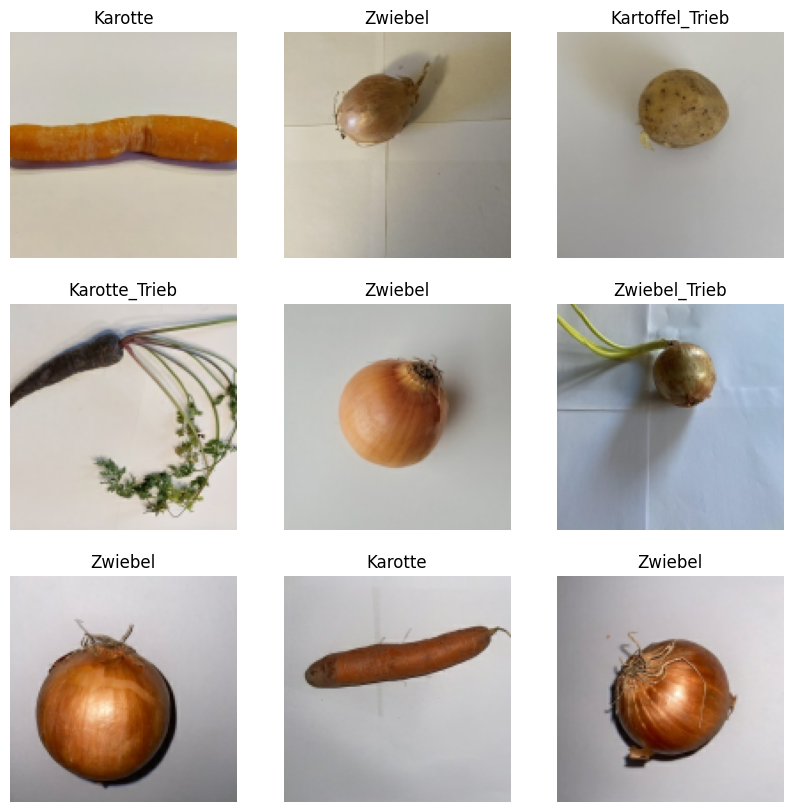

In [54]:
#Bilder einfach mal ausgeben lassen
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [55]:
#batch und Bildgrößen ausgeben lassen
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 128, 128, 3)
(128,)


In [56]:
#Modell definieren 2 Conv2D layer und am ende ein voll vernetztes 
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu',padding='same', kernel_regularizer=L2(0.01),input_shape=[img_height,img_width, 3]),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu',padding='same', kernel_regularizer=L2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(6, activation='softmax')
])


In [57]:
#Modell Kompilieren
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [58]:
#Modell trainieren
epoch=40
history=model.fit(
  ds_train,
  validation_data=ds_val,
  epochs=epoch,
)

Epoch 1/40


C:\Users\Lennart Pc\AppData\Roaming\Python\Python310\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


59/59 [==============================] - 94s 2s/step - loss: 1.9423 - accuracy: 0.4270 - val_loss: 1.1848 - val_accuracy: 0.6775
Epoch 2/40
59/59 [==============================] - 99s 2s/step - loss: 1.0705 - accuracy: 0.7039 - val_loss: 0.8796 - val_accuracy: 0.7819
Epoch 3/40
59/59 [==============================] - 96s 2s/step - loss: 0.8444 - accuracy: 0.7798 - val_loss: 0.6879 - val_accuracy: 0.8585
Epoch 4/40
59/59 [==============================] - 97s 2s/step - loss: 0.6954 - accuracy: 0.8260 - val_loss: 0.6077 - val_accuracy: 0.8561
Epoch 5/40
59/59 [==============================] - 97s 2s/step - loss: 0.5796 - accuracy: 0.8646 - val_loss: 0.4931 - val_accuracy: 0.9049
Epoch 6/40
59/59 [==============================] - 97s 2s/step - loss: 0.5169 - accuracy: 0.8855 - val_loss: 0.4665 - val_accuracy: 0.9095
Epoch 7/40
59/59 [==============================] - 95s 2s/step - loss: 0.4542 - accuracy: 0.9054 - val_loss: 0.4248 - val_accuracy: 0.9095
Epoch 8/40
59/59 [=============

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 65536)            

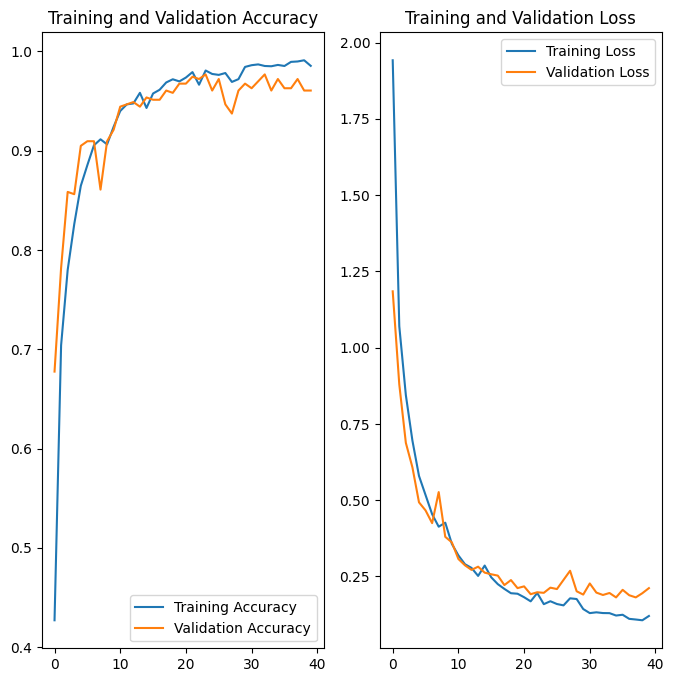

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [61]:
ds_test=tf.keras.utils.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN/Test_set/',
    color_mode='rgb',
    labels='inferred',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,   
)

Found 339 files belonging to 6 classes.


In [62]:
result=model.evaluate(ds_test)

3/3 [==============================] - 5s 355ms/step - loss: 0.5797 - accuracy: 0.8555


In [64]:
#model.save('D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN/model_data_augumentation_85p2.keras')